<a href="https://colab.research.google.com/github/pk2971/COVID-19-Image-Classification/blob/main/Covid_19_image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**COVID 19 image Classification**

Author: Praharshita Kaithepalli(pk2971@rit.edu)

Dataset found on Kaggle: https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset

As a person whose lungs have been effected by COVID-19, me and m family had to submit the lung scan to the doctor and wait for his response to confirm if it was COVID 19 or just a viral fever. This was also a time where the COVID 19 cases were blowing up in India and we have difficulties finding a doctors appointment and hospital beds. Using AI/ML we can find a way to easily classify if a patient has COVID 19 or not based upon the scanning images.

In [ ]:
import zipfile
import os
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Covid19-dataset.zip to Covid19-dataset.zip


In [ ]:
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['Covid19-dataset.zip']), 'r')
data.extractall()

In [ ]:
data.printdir()

In [ ]:
import tensorflow as tf
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [50]:
train_path='/content/Covid19-dataset/train'
test_path='/content/Covid19-dataset/test'


size of image (h x w) 3480 4248


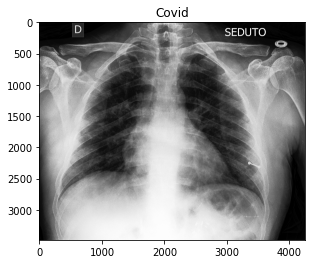

In [49]:
img = plt.imread(os.path.join(train_path, "Covid/01.jpeg"))
plt.imshow(img)
height, width, dim = img.shape
plt.title('Covid')
print("size of image (h x w)",height,width)

EfficientNet

SENet

Inception and Xception

ResNet

VGGNet

AlexNet

LeNet-5

Scaling the Data:

In [51]:
from keras_preprocessing.image import ImageDataGenerator
train = ImageDataGenerator(rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
train_dataset = train.flow_from_directory(train_path,
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'categorical',shuffle=True)

Found 251 images belonging to 3 classes.


In [53]:
train_dataset.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

Transfer Learning for Image Classification: